## Hackathon Batle - T-mac

##### Define the project

Your goal is to deliver insights about the data.
- What types of customers are most likely to respond to the direct mail campaign?
- Are there different customer archetypes that respond in predictable ways?

##### Decriptions

There are 145,231 observations of 1932 features. The final column, labeled `target` indicates whether or not the customer responded to the direct mail campaign.

##### Do EDA
Anything that you can think of

##### Feature selection

How do you select the features

##### Feature Engineering

Optimize your features

##### Refining

The best way to approach this problem is construct a model of whether or not a customer responds to the campaign.

##### Presentation

Your presentation should answer the following questions:

1. What steps did you take to clean the data? That is, how did you deal with outliers, missing values, etc.?
2. What are the most important features in the data?
3. Are there any relationships between features?
4. Is the model you built any good?
5. How can you tell if someone is likely to respond to a direct mail campaign?




In [2]:
from sklearn.decomposition import PCA as sPCA
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.cross_validation import train_test_split

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc



from matplotlib.mlab import PCA as mPCA


import seaborn as sns
import pandas as pd
import numpy as np



import matplotlib.pyplot as plt

%matplotlib inline

In [13]:
from __future__ import division
from collections import defaultdict, Counter
import numpy as np
import pandas as pd
from numpy.random import randn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.feature_selection import VarianceThreshold
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc
from scipy import interp
from sklearn.cross_validation import KFold
from sklearn.preprocessing import StandardScaler


%pylab inline
%matplotlib inline
%autoreload 2


Populating the interactive namespace from numpy and matplotlib


In [20]:
from sklearn.datasets import load_digits

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.decomposition import PCA
from sklearn import cluster, datasets, decomposition, ensemble
from sklearn import lda, manifold, random_projection, preprocessing


from statsmodels.regression import linear_model

import statsmodels.api as sm
import seaborn as sea
sea.set()

import pandas as pd
import numpy as np

digits = load_digits()

% pylab inline
% autoreload 2

Populating the interactive namespace from numpy and matplotlib


/Users/eloisaelias/anaconda/lib/python2.7/site-packages/sklearn/lda.py:4: DeprecationWarning: lda.LDA has been moved to discriminant_analysis.LinearDiscriminantAnalysis in 0.17 and will be removed in 0.19
  "in 0.17 and will be removed in 0.19", DeprecationWarning)


In [38]:
df = pd.read_csv('data1000.csv', index_col=0)

In [69]:
df = pd.read_csv('data1000.csv')

In [70]:
df[:2]

,ID,VAR_0001,VAR_0002,VAR_0003,VAR_0004,VAR_0005,VAR_0006,VAR_0007,VAR_0008,VAR_0009,...,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,VAR_1934,target
0,2,H,224,0,4300,C,0,0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0
1,4,H,7,53,4448,B,1,0,False,False,...,98,98,998,999999998,998,998,9998,9998,IAPS,0


In [71]:
sam = np.random.choice(df.index.values, df.shape[0]*0.1 )
df_sam = df.ix[sam]

/Users/eloisaelias/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  if __name__ == '__main__':


In [72]:
df_sam.describe()

,ID,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,...,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933,target
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,...,99.000000,99.000000,99.000000,99.000000,9.900000e+01,99.000000,99.000000,99.000000,99.000000,99.000000
mean,939.535354,129.757576,90.888889,3959.242424,0.797980,0.606061,0.797980,0.565657,0.686869,1.626263,...,1.131313,85.141414,90.101010,917.393939,9.898990e+08,916.353535,938.424242,9896.888889,8692.868687,0.232323
std,553.823672,199.246647,130.469473,6197.341092,1.684138,1.260209,1.684138,1.080076,1.475283,1.282423,...,9.942330,33.271306,26.628776,273.094467,1.005038e+08,213.229890,208.324712,1003.707900,3373.977973,0.424463
min,28.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,90.000000,0.000000,11.000000,24.000000,0.000000
25%,469.500000,30.000000,15.500000,1800.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,98.000000,98.000000,998.000000,1.000000e+09,998.000000,998.000000,9998.000000,9998.000000,0.000000
50%,960.000000,60.000000,60.000000,2500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,0.000000,98.000000,98.000000,998.000000,1.000000e+09,998.000000,998.000000,9998.000000,9998.000000,0.000000
75%,1298.000000,109.000000,106.000000,3501.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,...,0.000000,98.000000,98.000000,998.000000,1.000000e+09,998.000000,998.000000,9998.000000,9998.000000,0.000000
max,1925.000000,999.000000,999.000000,46000.000000,10.000000,9.000000,10.000000,7.000000,10.000000,9.000000,...,99.000000,99.000000,99.000000,999.000000,1.000000e+09,999.000000,999.000000,9999.000000,9999.000000,1.000000


In [73]:
y = df_sam.pop('target').values

X_inte = df_sam[df_sam.columns[df_sam.dtypes == 'int64']]

In [74]:
X_inte[:3]

,ID,VAR_0002,VAR_0003,VAR_0004,VAR_0006,VAR_0007,VAR_0013,VAR_0014,VAR_0015,VAR_0016,...,VAR_1924,VAR_1925,VAR_1926,VAR_1927,VAR_1928,VAR_1929,VAR_1930,VAR_1931,VAR_1932,VAR_1933
596,1174,2,4,3000,3,4,3,3,2,4,...,9998,0,98,98,998,999999998,998,998,9998,9998
747,1452,501,81,1410,0,0,0,0,0,1,...,94,0,98,98,998,999999998,998,998,9998,9998
99,191,9,144,6530,1,1,1,1,1,2,...,9998,0,98,98,998,999999998,998,998,9998,9998


In [77]:
feature_names = X_inte.columns

In [78]:
feature_names

Index([u'ID', u'VAR_0002', u'VAR_0003', u'VAR_0004', u'VAR_0006', u'VAR_0007',
       u'VAR_0013', u'VAR_0014', u'VAR_0015', u'VAR_0016',
       ...
       u'VAR_1924', u'VAR_1925', u'VAR_1926', u'VAR_1927', u'VAR_1928',
       u'VAR_1929', u'VAR_1930', u'VAR_1931', u'VAR_1932', u'VAR_1933'],
      dtype='object', length=1593)

#### Preprocessing

In [75]:
scaler = StandardScaler()

In [76]:
feature_scaling = scaler.fit_transform(X_inte)

In [80]:
pca = PCA(10)

principal_features = pca.fit_transform(feature_scaling, y)

In [81]:
def evariance_pca(pca):
    components = pca.n_components_
    xaxis = np.arange(components)
    evariance = pca.explained_variance_ratio_
    
    plt.figure(figsize=(12, 6))
    ax = plt.subplot(111)
    ax.bar(xaxis, evariance, 0.4, 
           color=['red', 'green', 'blue', 'cyan', 'magenta'], alpha=0.5)
    
    for i in xrange(components):
        ax.annotate('{:1.4}%'.format((str(evariance[i]*100))),
                   (xaxis[i], evariance[i]), 
                    fontsize=12)
    
#     ax.set_xticklabels(xaxis, fontsize=12)
    
    ax.set_ylim(0, max(evariance)+0.02)
    ax.set_xlim(0-0.45, 8+0.45)
    
    ax.set_xlabel('Principal Component')
    ax.set_ylabel('Explained Variance (%)')
    ax.set_title('PCA Pareto')

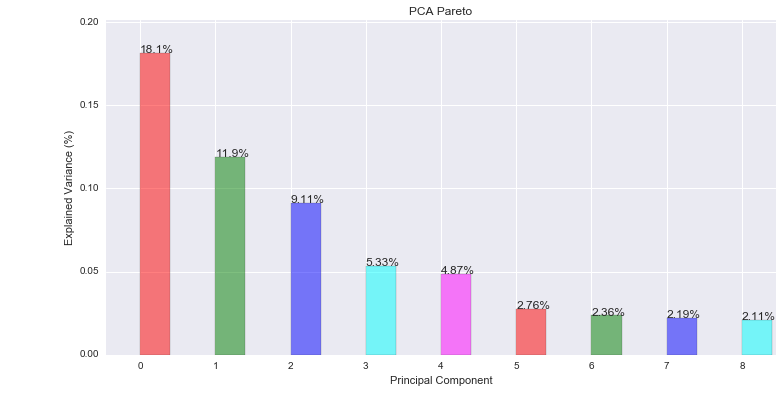

In [82]:
evariance_pca(pca)